In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

## **Initial Step : Reading the data**

In [2]:
import pandas as pd
df=pd.read_csv("train.csv") 

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.shape 

(45211, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
for i in df.columns:
  print(i)
  print(df[i].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education_qual
['tertiary' 'secondary' 'unknown' 'primary']
call_type
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur
[ 261  151   76 ... 1298 1246 1556]
num_calls
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [9]:
import numpy as np
numerical = df.select_dtypes(include=[np.number])
numerical.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

In [10]:
non_numerical = df.select_dtypes(include=['object']).columns
non_numerical

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

In [11]:
num_var = df[['age', 'day', 'dur', 'num_calls']]
cat_var = df[['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome','y']]
tar_var = df[['y']]

Supervised learning : FTS ( Based on given set of features we predict target variable )

Target variable(y) is binary categorical here.



## **Step 1 : Data Cleaning**

#### 1) We checked for any missing values in dataset

In [12]:
df.isnull().sum()                                   # There are no null values in columns

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [13]:
# droping the null values
df = df.dropna()

#### 2) We droped the all the duplicates

In [14]:
duplicates = df[df.duplicated()]
duplicates

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [15]:
df = df.drop_duplicates()

####3) We checked whether data is in right format

In [16]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#### 4) Outlier Analysis

In [17]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [18]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

ploting outliers

In [19]:
#%matplotlib inline
import matplotlib.pyplot as plt

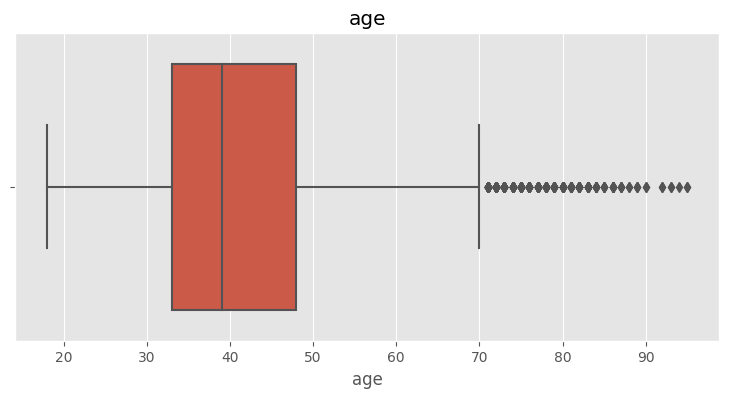

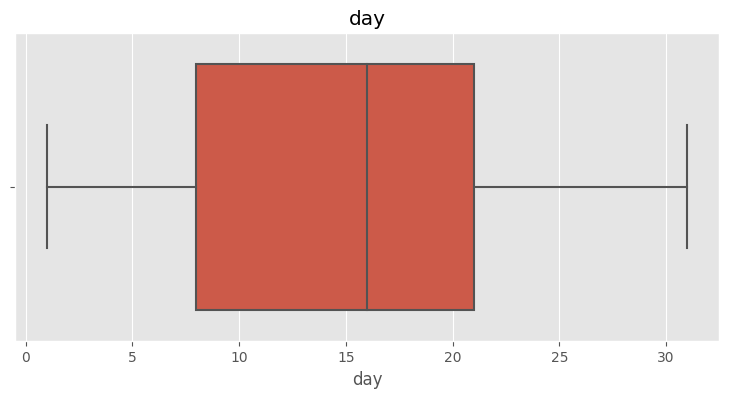

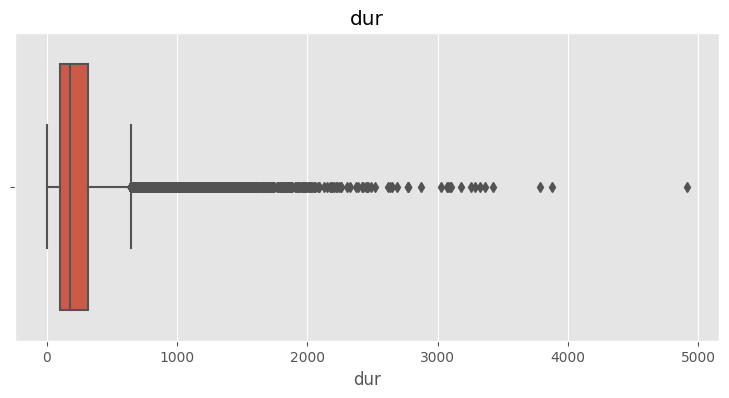

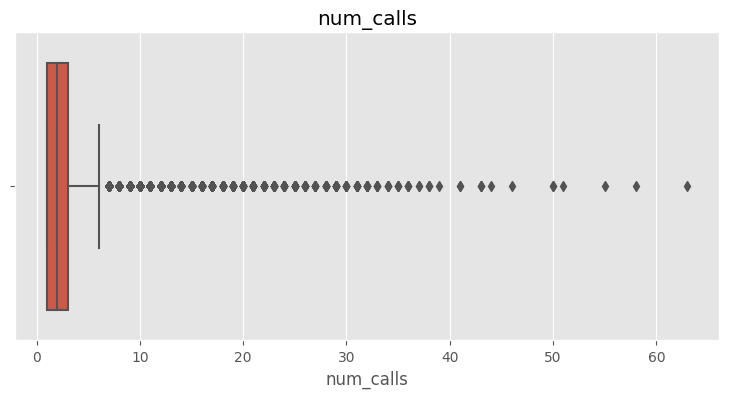

In [20]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

In [21]:
len(num_var.columns)

4

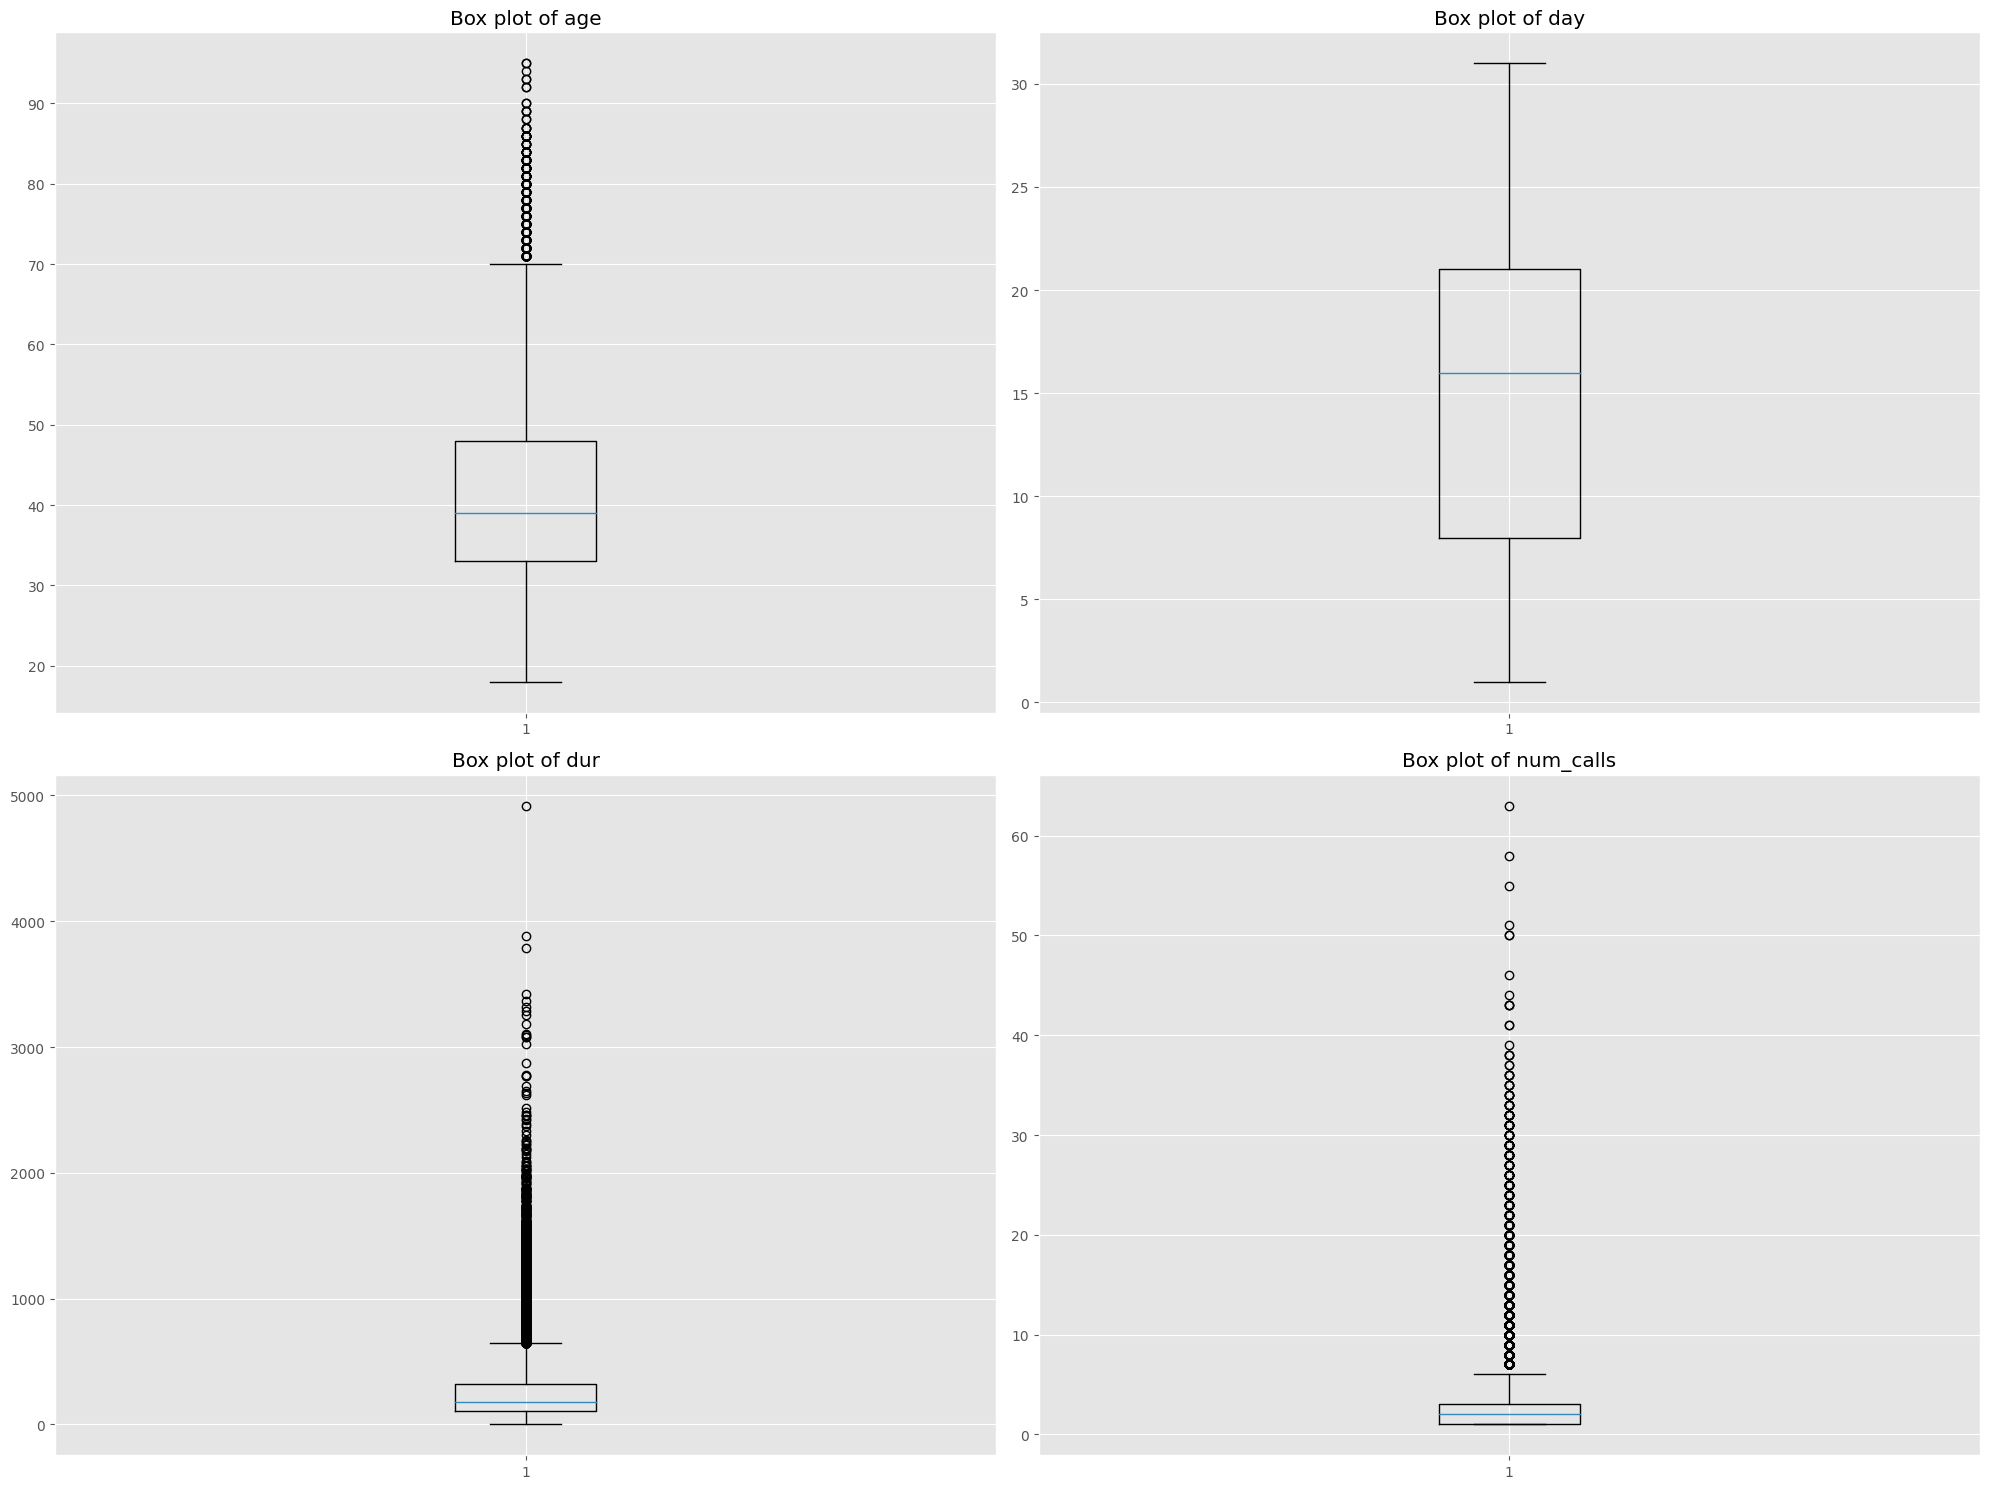

In [22]:
# Create the matrix of box plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()
for i, col in enumerate(num_var):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Box plot of {col}')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
for i in num_var:

  iqr = df[i].quantile(0.75) - df[i].quantile(0.25)              # There are outliers
  upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
  upper_threshold, lower_threshold

  df[i] = df[i].clip(lower_threshold,upper_threshold)

In [24]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


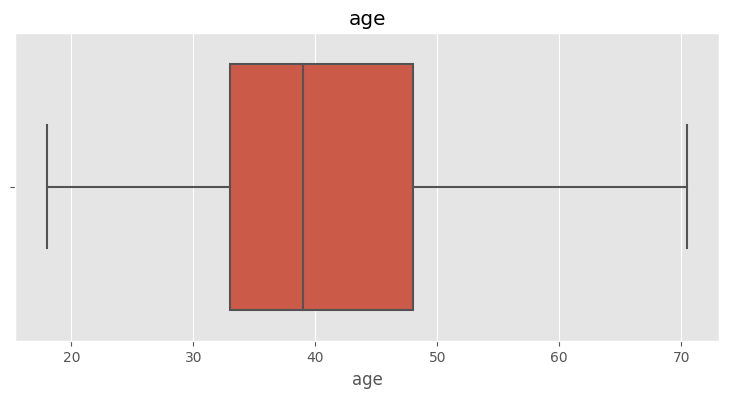

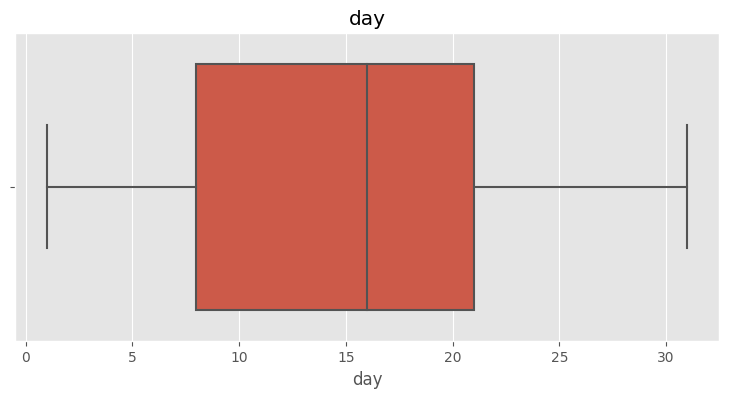

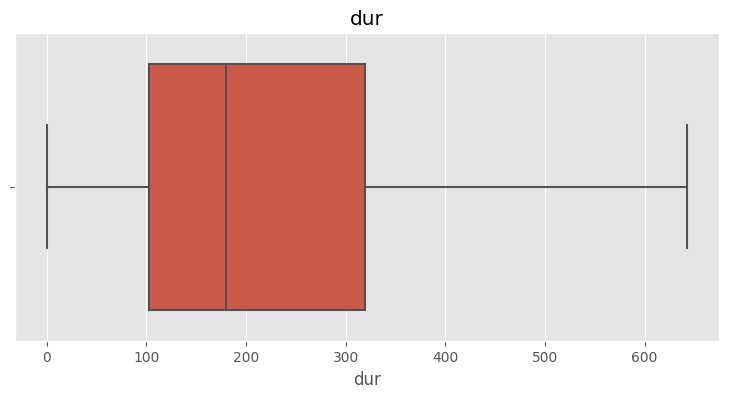

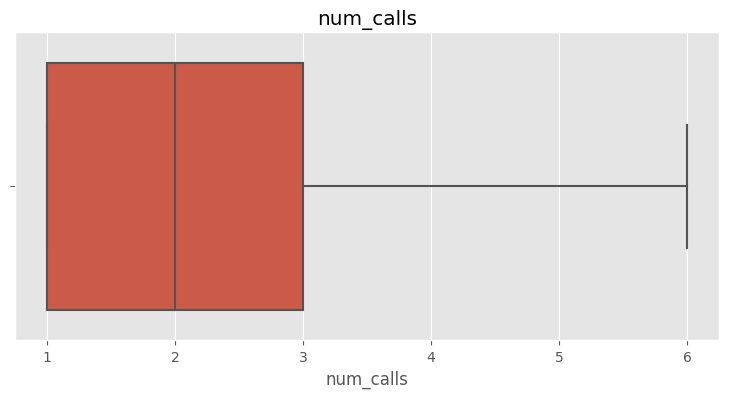

In [25]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.boxplot(data=df, x=column)
  plt.title(column)

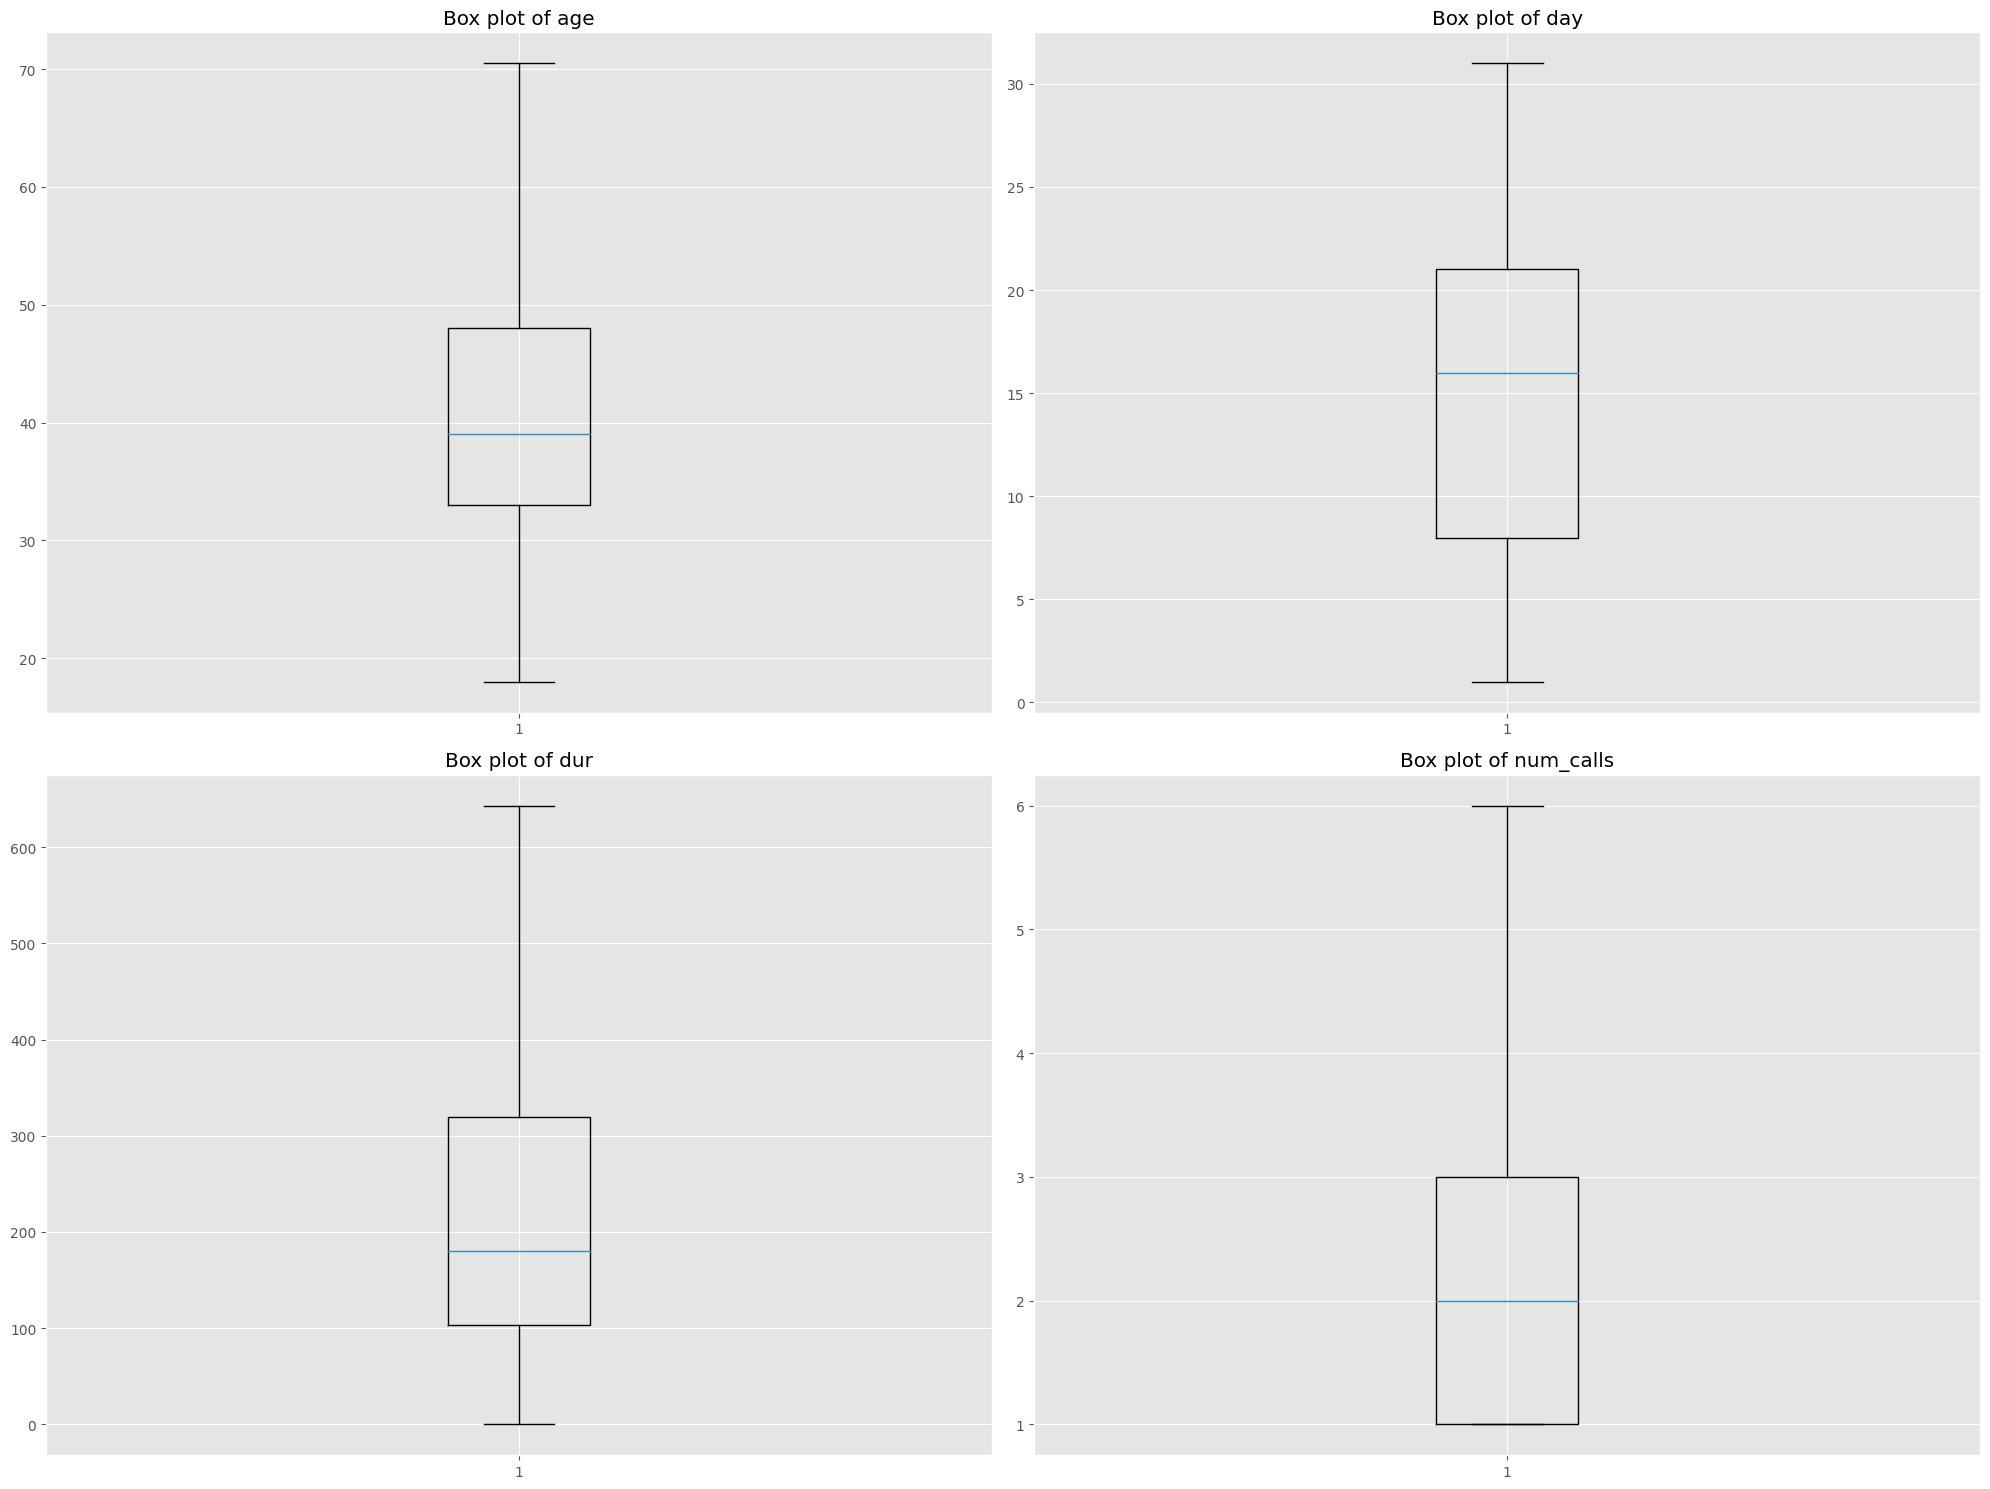

In [26]:
# Create the matrix of box plots
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()
for i, col in enumerate(num_var):
    axs[i].boxplot(df[col])
    axs[i].set_title(f'Box plot of {col}')

# Show the plot
plt.tight_layout()
plt.show()

## EDA

Feature Distribution Analysis

Categorical data analysis

In [27]:
cat_var.columns

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')

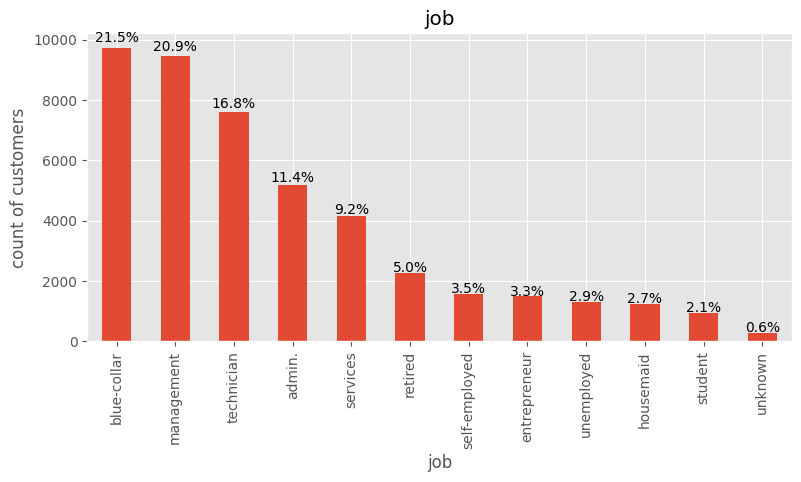

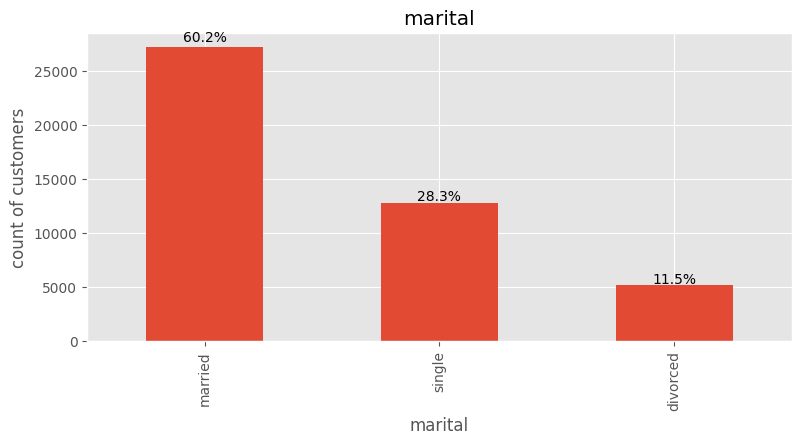

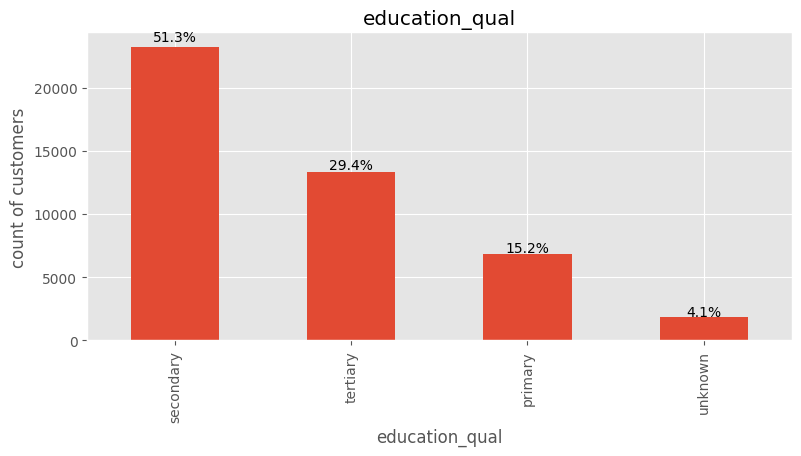

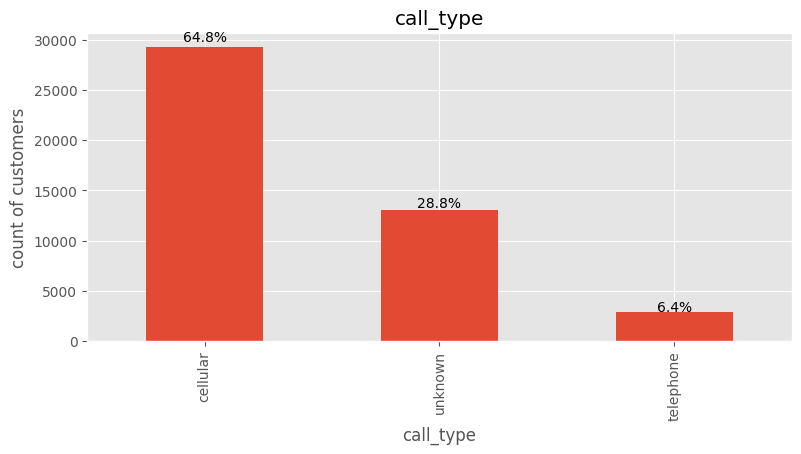

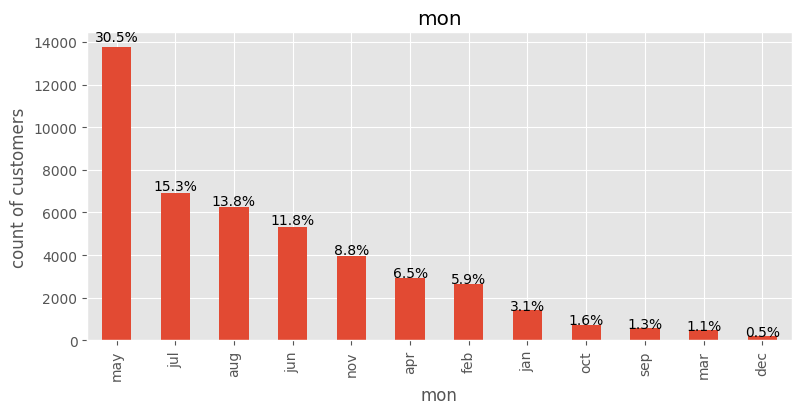

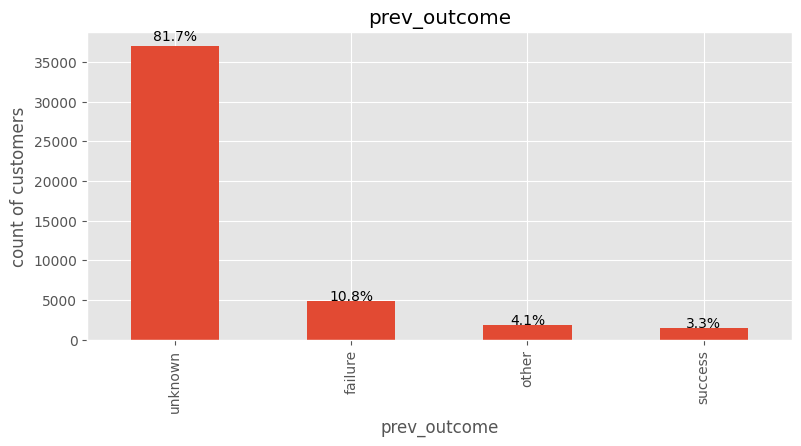

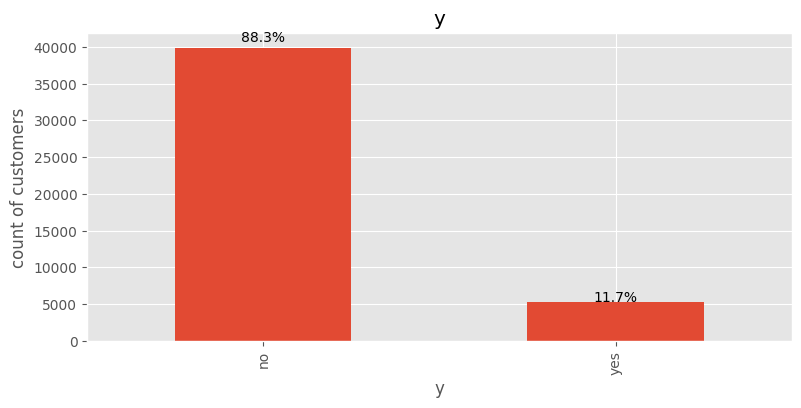

In [28]:
%matplotlib inline
#plt.style.use('ggplot')
import matplotlib.pyplot as plt

for column in cat_var:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('count of customers')
  plt.title(column)

  total = sum([p.get_height() for p in ax.patches])
  for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{height/total:.1%}', (x+ width/2, y + height*1.02), ha = 'center')

In [29]:
# From categorical feature distribustion analysis we came to the conclusion that we have to impute below values
impute=['job','education_qual']
for column in impute:
  mode = df[column].mode()[0]
  df[column] = df[column].replace('unknown',mode)

Numerical data analysis

In [30]:
num_var.columns

Index(['age', 'day', 'dur', 'num_calls'], dtype='object')

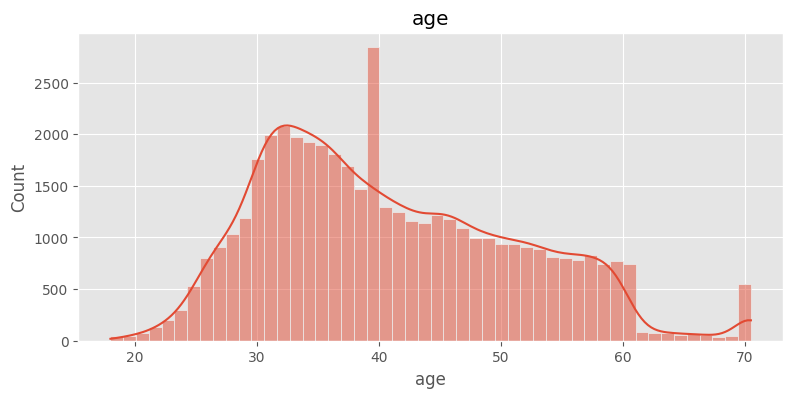

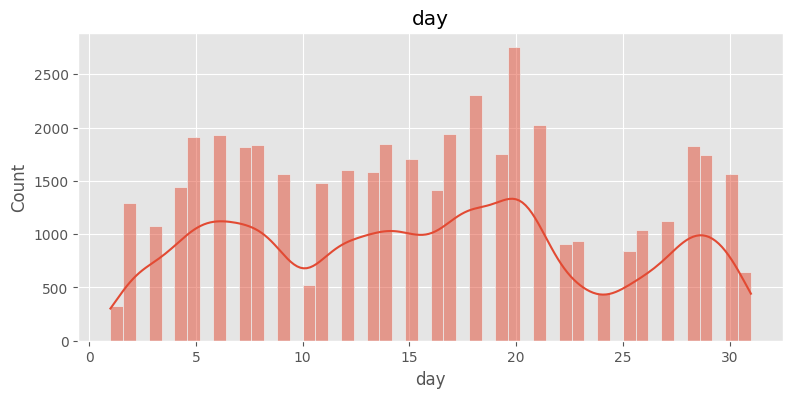

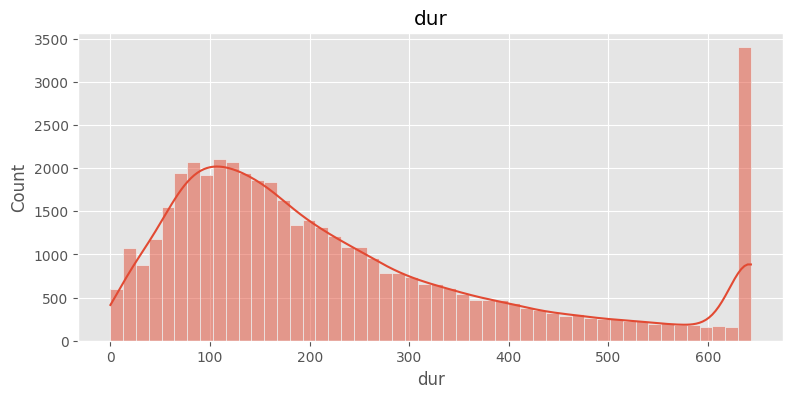

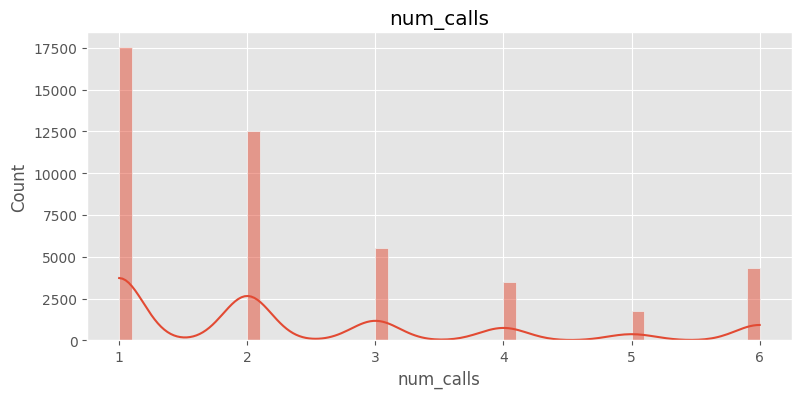

In [31]:
plt.style.use('ggplot')
for column in num_var.columns:
  plt.figure(figsize=(20,4))
  ax = plt.subplot(121)
  sns.histplot(data=df,x=column,kde=True,bins =50)
  plt.title(column)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'num_calls'}>]], dtype=object)

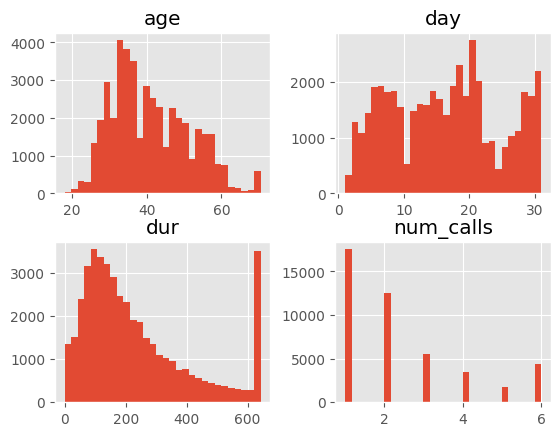

In [32]:
df.hist(bins=30)

#### Target variable analysis

In [33]:
tar_var.columns

Index(['y'], dtype='object')

In [34]:
df["y"] = df["y"].map({"yes" : 1, "no" : 0})

Class 0: 39916
Class 1: 5289
Proportion of class 0 is  88.3 %


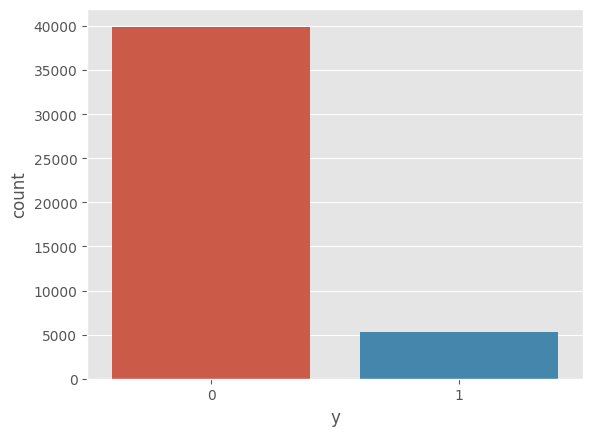

In [35]:
target_count = df.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
sns.countplot(x='y', data=df)
plt.show()

We came to conclusion that given data is imbalanced data

## Feature vs target variable

In [36]:
cat_var = df.select_dtypes(include=['object']).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


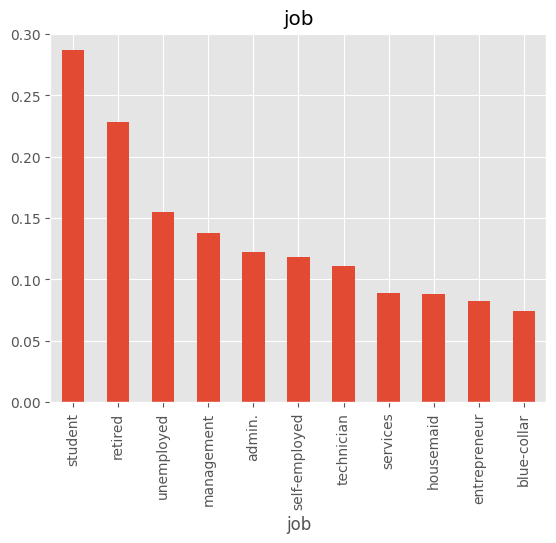

job
student          0.286780
retired          0.227915
unemployed       0.155027
management       0.137570
admin.           0.122050
self-employed    0.118429
technician       0.110585
services         0.088851
housemaid        0.087903
entrepreneur     0.082717
blue-collar      0.074067
Name: y, dtype: float64


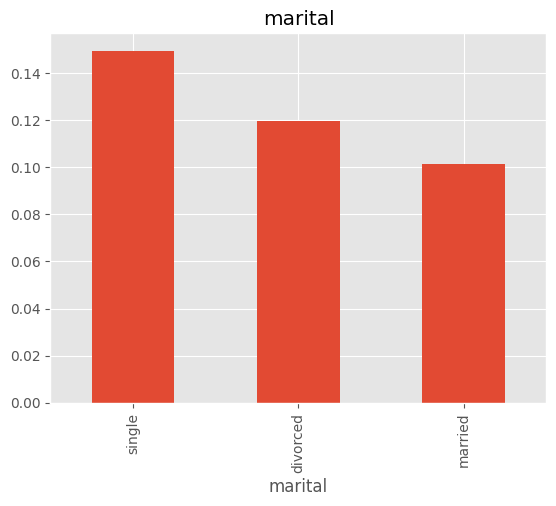

marital
single      0.149515
divorced    0.119455
married     0.101250
Name: y, dtype: float64


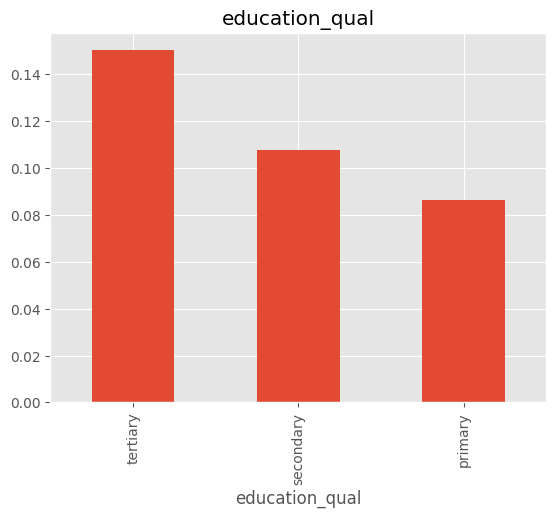

education_qual
tertiary     0.150086
secondary    0.107838
primary      0.086277
Name: y, dtype: float64


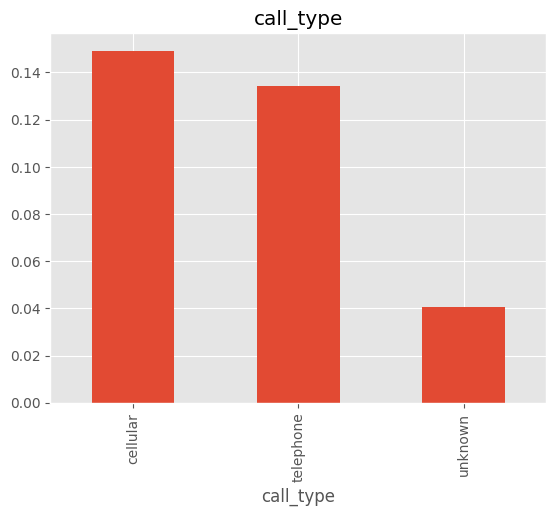

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: y, dtype: float64


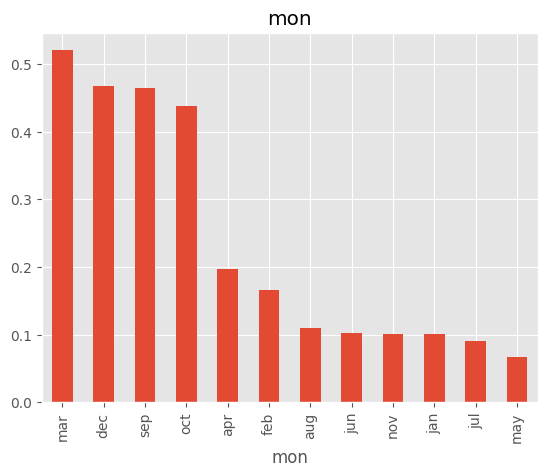

mon
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110168
jun    0.102266
nov    0.101511
jan    0.101212
jul    0.090949
may    0.067199
Name: y, dtype: float64


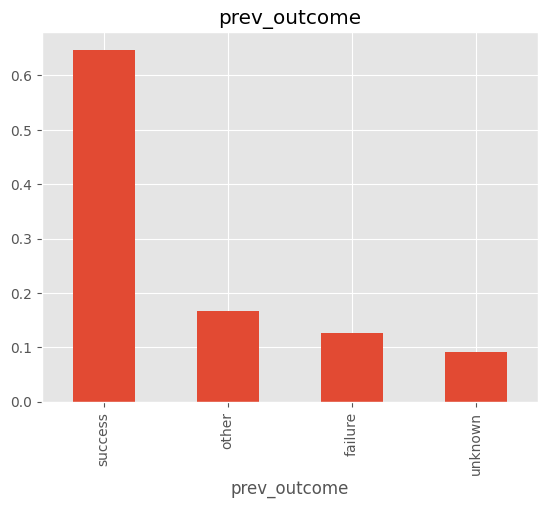

prev_outcome
success    0.647253
other      0.166848
failure    0.126097
unknown    0.091630
Name: y, dtype: float64


In [37]:
for i in cat_var:
    df.groupby(i)['y'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(i) # add a title to each plot
    plt.show()  # create a new figure for each plot
    print(df.groupby(i)['y'].mean().sort_values(ascending=False))

from above analysis we came to conclusion that features job,marital,education_qual has linear pattern withrespect to target variable

So we can go with label encoding for these features

#### Correlation

In [38]:
corr_y = df.corr()['y']
print(corr_y)

age          0.018946
day         -0.028371
dur          0.390642
num_calls   -0.084067
y            1.000000
Name: y, dtype: float64


In [39]:
corr_y = corr_y[:-1].abs().sort_values(ascending = False)
corr_y

dur          0.390642
num_calls    0.084067
day          0.028371
age          0.018946
Name: y, dtype: float64

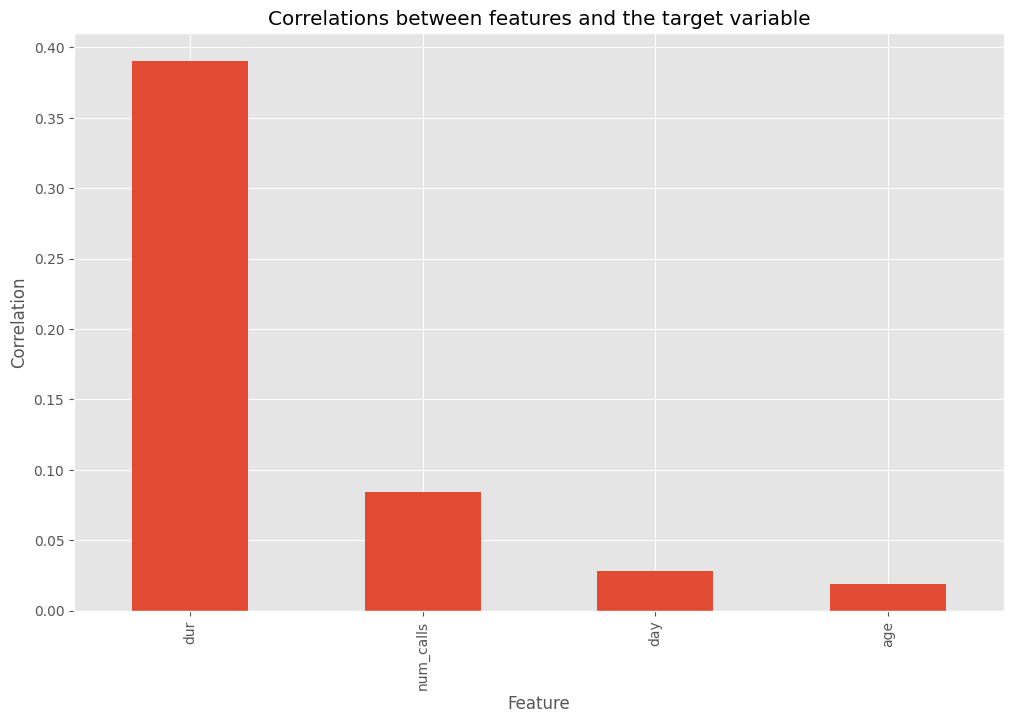

In [40]:
plt.figure(figsize=(12,7.5))
corr_y.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations between features and the target variable')
plt.show()

##**Step 3 : Preprocessing data ( Reading the data for ML purposes )**

### Encoding

In [41]:
dfT = df

dfT["job"] = dfT["job"].map({'blue-collar': 0,'entrepreneur': 1, 'housemaid':2, 'services' :3, 'technician' :4, 'self-employed':5, 'admin.' :6, 'management' :7, 'unemployed':8, 'retired':9, 'student':10 })
dfT["marital"] = dfT["marital"].map({'married':0, 'divorced':1, 'single':2 })
dfT["education_qual"] = dfT["education_qual"].map({'primary':0, 'secondary':1, 'tertiary':2 })

#one hot encoding
dfT = pd.get_dummies(dfT,columns = ["call_type"])
dfT = pd.get_dummies(dfT,columns = ["mon"])
dfT = pd.get_dummies(dfT,columns = ["prev_outcome"])

In [42]:
dfT

,age,job,marital,education_qual,day,dur,num_calls,y,call_type_cellular,call_type_telephone,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,7,0,2,5,261,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44.0,4,2,1,5,151,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,1,0,1,5,76,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,0,0,1,5,92,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,0,2,1,5,198,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,2,17,643,3,1,1,0,...,0,0,0,1,0,0,0,0,0,1
45207,70.5,9,1,0,17,456,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
45208,70.5,9,0,1,17,643,5,1,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57.0,0,0,1,17,508,4,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### Splitting

Seperating feature & target variable

In [43]:
Y = dfT['y'].values    # target varaibles
X = dfT.drop('y', axis = 1).values # features

In [44]:
# # # Saving feature names for later use
feature_list = list(dfT.drop('y', axis = 1).columns) # feature labels

In [45]:
Y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
X

array([[58. ,  7. ,  0. , ...,  0. ,  0. ,  1. ],
       [44. ,  4. ,  2. , ...,  0. ,  0. ,  1. ],
       [33. ,  1. ,  0. , ...,  0. ,  0. ,  1. ],
       ...,
       [70.5,  9. ,  0. , ...,  0. ,  1. ,  0. ],
       [57. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [37. ,  1. ,  0. , ...,  1. ,  0. ,  0. ]])

In [47]:
feature_list

['age',
 'job',
 'marital',
 'education_qual',
 'day',
 'dur',
 'num_calls',
 'call_type_cellular',
 'call_type_telephone',
 'call_type_unknown',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_feb',
 'mon_jan',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'prev_outcome_failure',
 'prev_outcome_other',
 'prev_outcome_success',
 'prev_outcome_unknown']

In [48]:
original_feature_list = list(df.drop('y', axis = 1))
original_feature_list

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

Splitting

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
x_train

array([[31.,  2.,  0., ...,  0.,  0.,  1.],
       [42.,  0.,  0., ...,  0.,  0.,  0.],
       [60.,  9.,  0., ...,  0.,  0.,  1.],
       ...,
       [33.,  7.,  2., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  1.],
       [39.,  0.,  0., ...,  0.,  0.,  1.]])

In [51]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
x_train.shape, x_test.shape

((36164, 26), (9041, 26))

### 4) Sampling data

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

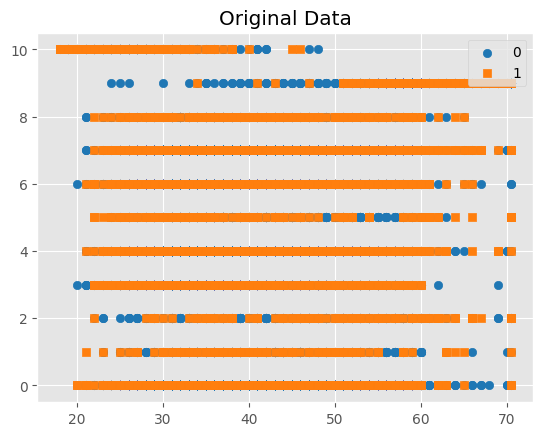

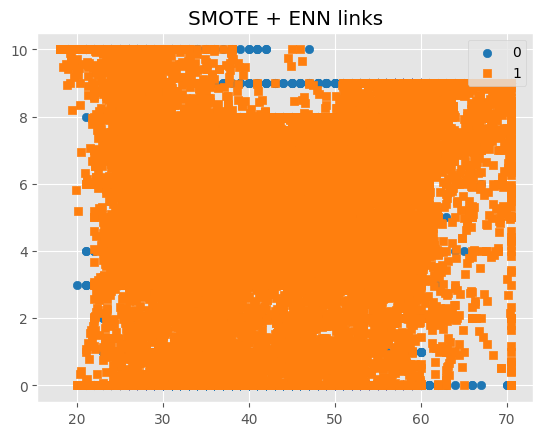

In [54]:
from imblearn.combine import SMOTEENN                   

plot_2d_space(x_train, y_train, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(x_train, y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [55]:
len(X_smt),len(y_smt)

(52248, 52248)

### Scaling data

In [56]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train_scaled = std.fit_transform(X_smt)
x_test_scaled = std.transform(x_test)

We have to train our model on x_train_scaled, y_smt

##**Step 4 : Model building ( Constructing the ML Algos )**

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,100]: 
  dtc = DecisionTreeClassifier(max_depth=depth)
  dtc.fit(x_train_scaled, y_smt) 
  valAccuracy = cross_val_score(dtc, x_train_scaled, y_smt, cv=10)
  trainAccuracy = accuracy_score(y_smt, dtc.predict(x_train_scaled))
  print("Depth: ", depth, "Training Accuracy: ", round(trainAccuracy, 4), "Cross val score: ", round(np.mean(valAccuracy), 4))


Depth:  1 Training Accuracy:  0.792 Cross val score:  0.7915
Depth:  2 Training Accuracy:  0.8493 Cross val score:  0.849
Depth:  3 Training Accuracy:  0.8776 Cross val score:  0.8764
Depth:  4 Training Accuracy:  0.8846 Cross val score:  0.8819
Depth:  5 Training Accuracy:  0.9055 Cross val score:  0.9038
Depth:  6 Training Accuracy:  0.9233 Cross val score:  0.9196
Depth:  7 Training Accuracy:  0.9375 Cross val score:  0.9316
Depth:  8 Training Accuracy:  0.945 Cross val score:  0.9362
Depth:  9 Training Accuracy:  0.9566 Cross val score:  0.9464
Depth:  10 Training Accuracy:  0.9638 Cross val score:  0.9492
Depth:  20 Training Accuracy:  0.998 Cross val score:  0.9549
Depth:  25 Training Accuracy:  0.9996 Cross val score:  0.9542
Depth:  30 Training Accuracy:  1.0 Cross val score:  0.9543
Depth:  40 Training Accuracy:  1.0 Cross val score:  0.9538
Depth:  50 Training Accuracy:  1.0 Cross val score:  0.954
Depth:  100 Training Accuracy:  1.0 Cross val score:  0.9537


In [58]:
dt = DecisionTreeClassifier(max_depth=20)

# Fit dt to the training set
dt.fit(x_train_scaled, y_smt)

DecisionTreeClassifier(max_depth=20)

In [59]:
y_pred_dt = dt.predict(x_test_scaled)
y_pred_dt

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,dt.predict_proba(x_test_scaled)[:,1])

0.7862391930835735

In [61]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 score:", f1_score(y_test, y_pred_dt))
print("auroc:", roc_auc_score(y_test, y_pred_dt))

Accuracy: 0.8587545625483907
F1 score: 0.544091395930025
auroc: 0.8036192363112391


In [62]:
import numpy as np

y_pred_dt = np.array(y_pred_dt)
count_of_1 = np.count_nonzero(y_pred_dt == 1)
count_of_0 = np.count_nonzero(y_pred_dt == 0)
print(count_of_1, count_of_0)
len(y_pred_dt)

1760 7281


9041

Confusion matrix:
 [[7002  998]
 [ 279  762]]


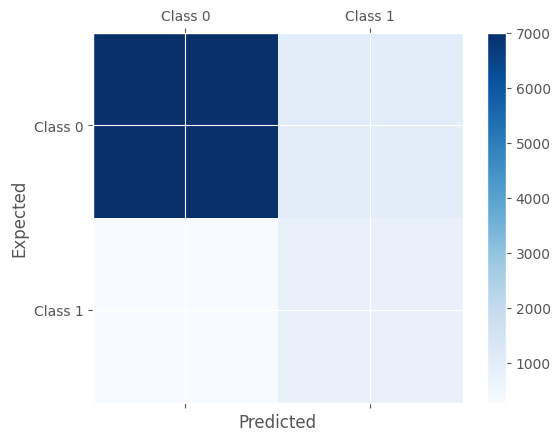

In [63]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()    

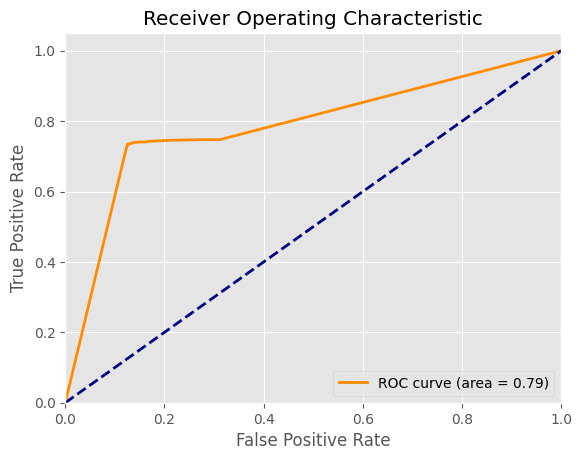

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

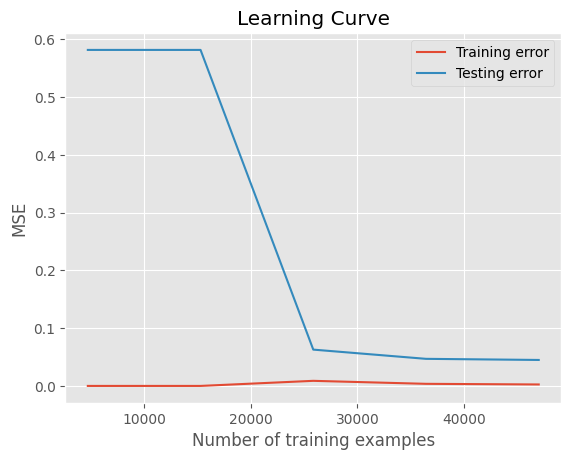

In [95]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    dt, x_train_scaled, y_smt, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [66]:
# Get numerical feature importances
importances = list(dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dur                  Importance: 0.45
Variable: prev_outcome_success Importance: 0.11
Variable: call_type_unknown    Importance: 0.06
Variable: prev_outcome_unknown Importance: 0.05
Variable: day                  Importance: 0.04
Variable: mon_apr              Importance: 0.04
Variable: age                  Importance: 0.03
Variable: job                  Importance: 0.03
Variable: mon_feb              Importance: 0.03
Variable: mon_mar              Importance: 0.03
Variable: mon_oct              Importance: 0.02
Variable: prev_outcome_failure Importance: 0.02
Variable: education_qual       Importance: 0.01
Variable: num_calls            Importance: 0.01
Variable: mon_aug              Importance: 0.01
Variable: mon_jan              Importance: 0.01
Variable: mon_jul              Importance: 0.01
Variable: mon_jun              Importance: 0.01
Variable: mon_may              Importance: 0.01
Variable: mon_nov              Importance: 0.01
Variable: mon_sep              Importanc

### RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(x_train_scaled,y_smt);

In [68]:
y_pred_rf = rf.predict(x_test_scaled)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rf.predict_proba(x_test_scaled)[:,1])

0.8681827569644572

In [70]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
y_pred_rf = rf.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 score:", f1_score(y_test, y_pred_rf))
print("auroc:", roc_auc_score(y_test, y_pred_rf))

Accuracy: 0.7293440991040814
F1 score: 0.4243707362973418
auroc: 0.7889872718539865


In [71]:
import numpy as np

y_pred_rf = np.array(y_pred_rf)
count_of_1 = np.count_nonzero(y_pred_rf == 1)
count_of_0 = np.count_nonzero(y_pred_rf == 0)
print(count_of_1, count_of_0)
len(y_pred_rf)

3210 5831


9041

Confusion matrix:
 [[5692 2308]
 [ 139  902]]


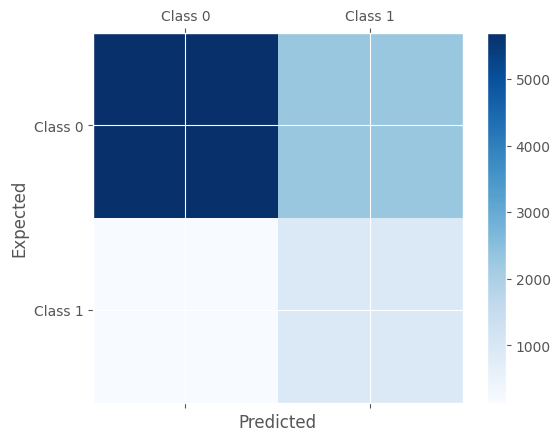

In [72]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_rf)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()                                                                       # This only for proof

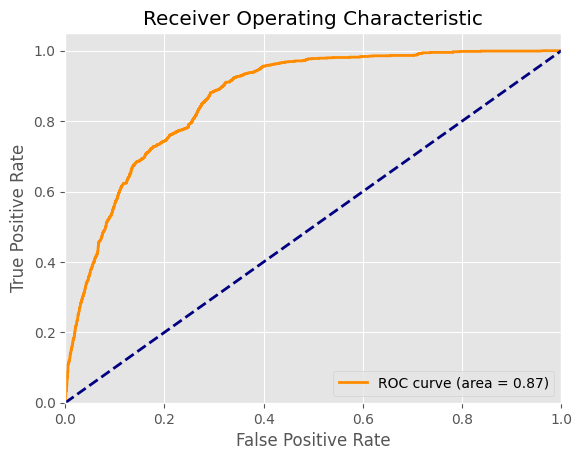

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

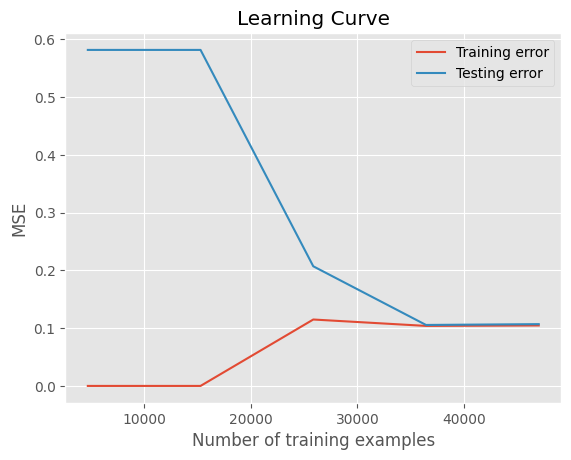

In [96]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    rf, x_train_scaled, y_smt, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

#### Feature Importance

In [75]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: dur                  Importance: 0.38
Variable: call_type_cellular   Importance: 0.13
Variable: prev_outcome_success Importance: 0.1
Variable: call_type_unknown    Importance: 0.09
Variable: prev_outcome_unknown Importance: 0.09
Variable: mon_may              Importance: 0.04
Variable: marital              Importance: 0.03
Variable: education_qual       Importance: 0.03
Variable: job                  Importance: 0.02
Variable: age                  Importance: 0.01
Variable: num_calls            Importance: 0.01
Variable: mon_aug              Importance: 0.01
Variable: mon_jul              Importance: 0.01
Variable: mon_oct              Importance: 0.01
Variable: prev_outcome_failure Importance: 0.01
Variable: day                  Importance: 0.0
Variable: call_type_telephone  Importance: 0.0
Variable: mon_apr              Importance: 0.0
Variable: mon_dec              Importance: 0.0
Variable: mon_feb              Importance: 0.0
Variable: mon_jan              Importance: 0.0

### Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier # this is the function that ensembles my model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
VC = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn',model3)], voting='soft') # it will stitich all the models together, voting = hard means max voting 

VC.fit(x_train_scaled,y_smt) 

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=3))],
                 voting='soft')

In [77]:
y_pred_vc = VC.predict(x_test_scaled)
y_pred_vc

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
import numpy as np

y_pred_vc = np.array(y_pred_vc)
count_of_1 = np.count_nonzero(y_pred_vc == 1)
count_of_0 = np.count_nonzero(y_pred_vc == 0)
print(count_of_1, count_of_0)
len(y_pred_vc)

2075 6966


9041

In [79]:
from sklearn.metrics import roc_auc_score
#model.score(x_test,y_test) # prediction
roc_auc_score(y_test,VC.predict_proba(x_test_scaled)[:,1])

0.9113695965417867

In [80]:
model3 = KNeighborsClassifier(3)
model3.fit(x_train_scaled,y_smt)
roc_auc_score(y_test,model3.predict_proba(x_test_scaled)[:,1])

0.8562750360230548

In [81]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_vc))
print("F1 score:", f1_score(y_test, y_pred_vc))
print("auroc:", roc_auc_score(y_test, y_pred_vc))

Accuracy: 0.8480256608782214
F1 score: 0.5590500641848524
auroc: 0.8430977425552354


Confusion matrix:
 [[6796 1204]
 [ 170  871]]


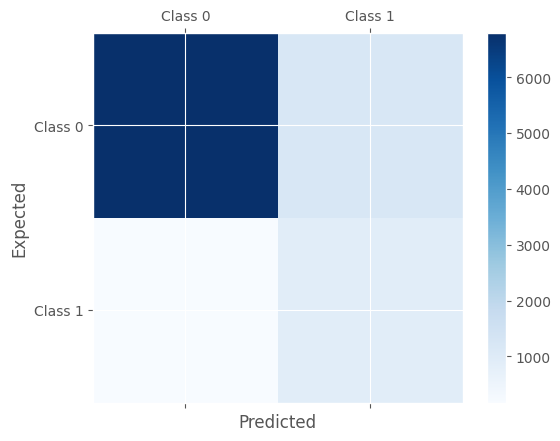

In [82]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_vc)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()                                                                       

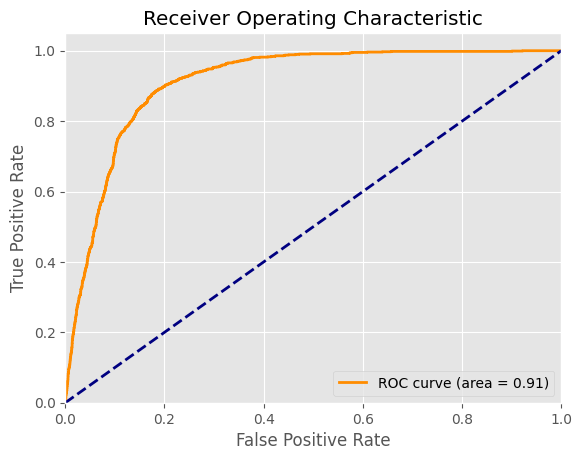

In [83]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, VC.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

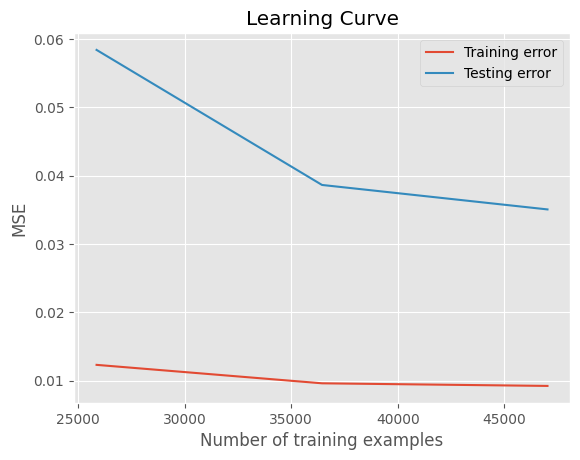

In [97]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    VC, x_train_scaled, y_smt, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

### XG - Boost Classifier

In [85]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train_scaled,y_smt) #train the model
  model.score(x_test_scaled, y_test) # scoring the model
  print("Learning rate : ", lr, " Train score : ",round(model.score(x_train_scaled,y_smt),4), " Cross-Val score : ", round(np.mean(cross_val_score(model, x_train_scaled, y_smt, cv=10)),4))

Learning rate :  0.01  Train score :  0.9456  Cross-Val score :  0.9395
Learning rate :  0.02  Train score :  0.9598  Cross-Val score :  0.9536
Learning rate :  0.03  Train score :  0.9641  Cross-Val score :  0.9575
Learning rate :  0.04  Train score :  0.9676  Cross-Val score :  0.9595
Learning rate :  0.05  Train score :  0.9695  Cross-Val score :  0.9603
Learning rate :  0.06  Train score :  0.9725  Cross-Val score :  0.9619
Learning rate :  0.07  Train score :  0.9733  Cross-Val score :  0.9622
Learning rate :  0.08  Train score :  0.9743  Cross-Val score :  0.9617
Learning rate :  0.09  Train score :  0.9757  Cross-Val score :  0.9623
Learning rate :  0.1  Train score :  0.9767  Cross-Val score :  0.9624
Learning rate :  0.11  Train score :  0.9776  Cross-Val score :  0.9624
Learning rate :  0.12  Train score :  0.9778  Cross-Val score :  0.9625
Learning rate :  0.13  Train score :  0.9785  Cross-Val score :  0.9626
Learning rate :  0.14  Train score :  0.9803  Cross-Val score :  

In [86]:
xgbc = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100)
xgbc.fit(x_train_scaled,y_smt) #train the model
xgbc.score(x_test_scaled, y_test) # scoring the model 

0.883862404601261

In [87]:
y_pred_xgbc = xgbc.predict(x_test_scaled)
y_pred_xgbc

array([1, 0, 0, ..., 0, 0, 0])

In [88]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,xgbc.predict_proba(x_test_scaled)[:,1])

0.9223091978866473

In [89]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred_xgbc))
print("F1 score:", f1_score(y_test, y_pred_xgbc))
print("auroc:", roc_auc_score(y_test, y_pred_xgbc))

Accuracy: 0.883862404601261
F1 score: 0.6073298429319371
auroc: 0.8386971061479347


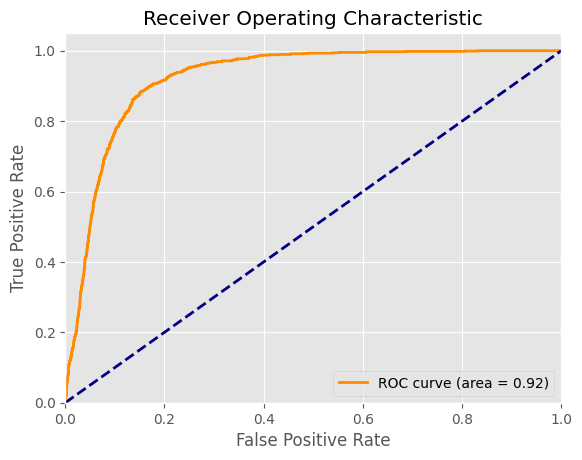

In [90]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion matrix:
 [[7179  821]
 [ 229  812]]


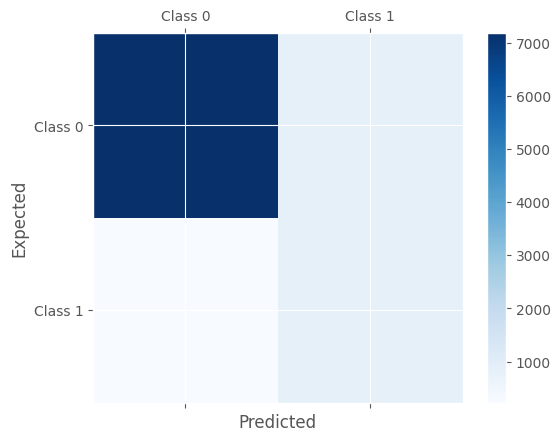

In [91]:
from sklearn.metrics import confusion_matrix                                    
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_xgbc)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()     

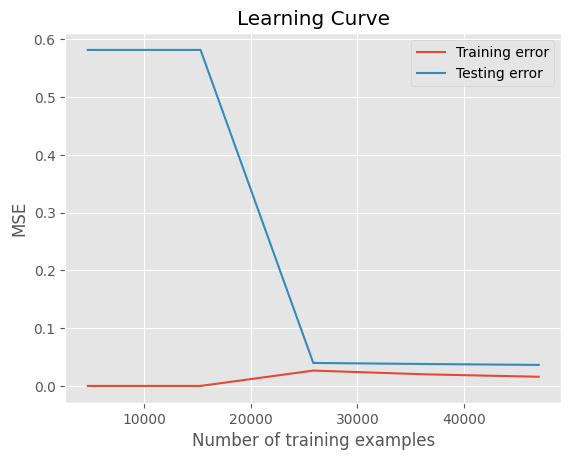

In [99]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(
    xgbc, x_train_scaled, y_smt, cv=10, scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, -train_mean, label='Training error')
plt.plot(train_sizes, -test_mean, label='Testing error')
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(xgbc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: call_type_unknown    Importance: 0.10999999940395355
Variable: prev_outcome_success Importance: 0.10999999940395355
Variable: prev_outcome_unknown Importance: 0.09000000357627869
Variable: dur                  Importance: 0.07000000029802322
Variable: prev_outcome_failure Importance: 0.07000000029802322
Variable: mon_mar              Importance: 0.05000000074505806
Variable: mon_may              Importance: 0.05000000074505806
Variable: mon_oct              Importance: 0.05000000074505806
Variable: call_type_cellular   Importance: 0.03999999910593033
Variable: mon_apr              Importance: 0.03999999910593033
Variable: mon_feb              Importance: 0.03999999910593033
Variable: mon_jul              Importance: 0.03999999910593033
Variable: education_qual       Importance: 0.029999999329447746
Variable: mon_aug              Importance: 0.029999999329447746
Variable: mon_nov              Importance: 0.029999999329447746
Variable: prev_outcome_other   Importance: 0.0299999

## ALL Models

In [102]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
scores = {}
acc_list = []
f1_list = []
auroc_list = []
cv_list = []
def model(model):
    model.fit(x_train_scaled,y_smt)
    y_pred = model.predict(x_test_scaled)
    Accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", Accuracy )
    f1_s = f1_score(y_test, y_pred) 
    print("F1 score:",f1_s)
    auroc = roc_auc_score(y_test, y_pred)
    print("Auroc:", auroc)
    cv_score = cross_val_score(model,x_train_scaled,y_smt,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    acc_list.append(Accuracy)
    f1_list.append(f1_s)
    auroc_list.append(auroc)
    cv_list.append(np.mean(cv_score))

In [103]:
from xgboost import XGBClassifier
clf = XGBClassifier()
model(clf)


Accuracy: 0.8810972237584338
F1 score: 0.6011131725417439
Auroc: 0.8362989913544667
Cross Val Score: 0.9382769697977096


In [104]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
model(clf)

Accuracy: 0.7782324964052649
F1 score: 0.4820459829501421
Auroc: 0.8295643011527377
Cross Val Score: 0.9019484953345962


In [105]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model(clf)

Accuracy: 0.8782214356818936
F1 score: 0.5920711374583179
Auroc: 0.8300781099903939
Cross Val Score: 0.9555209248292345


In [106]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model(clf)

Accuracy: 0.8562105961729897
F1 score: 0.5406360424028269
Auroc: 0.803435158501441
Cross Val Score: 0.9448028441631052


In [107]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
model(clf)

Accuracy: 0.8370755447406261
F1 score: 0.5334178017104846
Auroc: 0.8247938280499519
Cross Val Score: 0.9515198533226549


In [108]:
from sklearn.svm import SVC
clf = SVC()
model(clf)

Accuracy: 0.852671164694171
F1 score: 0.5689320388349515
Auroc: 0.8490652017291066
Cross Val Score: 0.9501612049595186


In [109]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model(clf)

Accuracy: 0.8460347306713859
F1 score: 0.4974729241877256
Auroc: 0.7659317963496639
Cross Val Score: 0.8118974723892446


In [110]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
model(clf)

Accuracy: 0.863068244663201
F1 score: 0.5656140350877192
Auroc: 0.8244402617675313
Cross Val Score: 0.9450899493140754


In [111]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
model(clf)

Accuracy: 0.8667182833757328
F1 score: 0.5794066317626527
Auroc: 0.8365301392891451
Cross Val Score: 0.9514823945516181


In [112]:
models = ["XGBClassifier","LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC","GaussianNB","AdaBoostClassifier","GradientBoostingClassifier"]
acc_list

[0.8810972237584338,
 0.7782324964052649,
 0.8782214356818936,
 0.8562105961729897,
 0.8370755447406261,
 0.852671164694171,
 0.8460347306713859,
 0.863068244663201,
 0.8667182833757328]

In [113]:
scores = { "Model_Name" : models , "Accuracy_Score" : acc_list, "F1_Scores" : f1_list, "Auroc_Score": auroc_list, "Cross_val_Score": cv_list}
df1 = pd.DataFrame(scores)
df1

,Model_Name,Accuracy_Score,F1_Scores,Auroc_Score,Cross_val_Score
0,XGBClassifier,0.881097,0.601113,0.836299,0.938277
1,LogisticRegression,0.778232,0.482046,0.829564,0.901948
2,RandomForestClassifier,0.878221,0.592071,0.830078,0.955521
3,DecisionTreeClassifier,0.856211,0.540636,0.803435,0.944803
4,KNeighborsClassifier,0.837076,0.533418,0.824794,0.951520
5,SVC,0.852671,0.568932,0.849065,0.950161
6,GaussianNB,0.846035,0.497473,0.765932,0.811897
7,AdaBoostClassifier,0.863068,0.565614,0.824440,0.945090
8,GradientBoostingClassifier,0.866718,0.579407,0.836530,0.951482


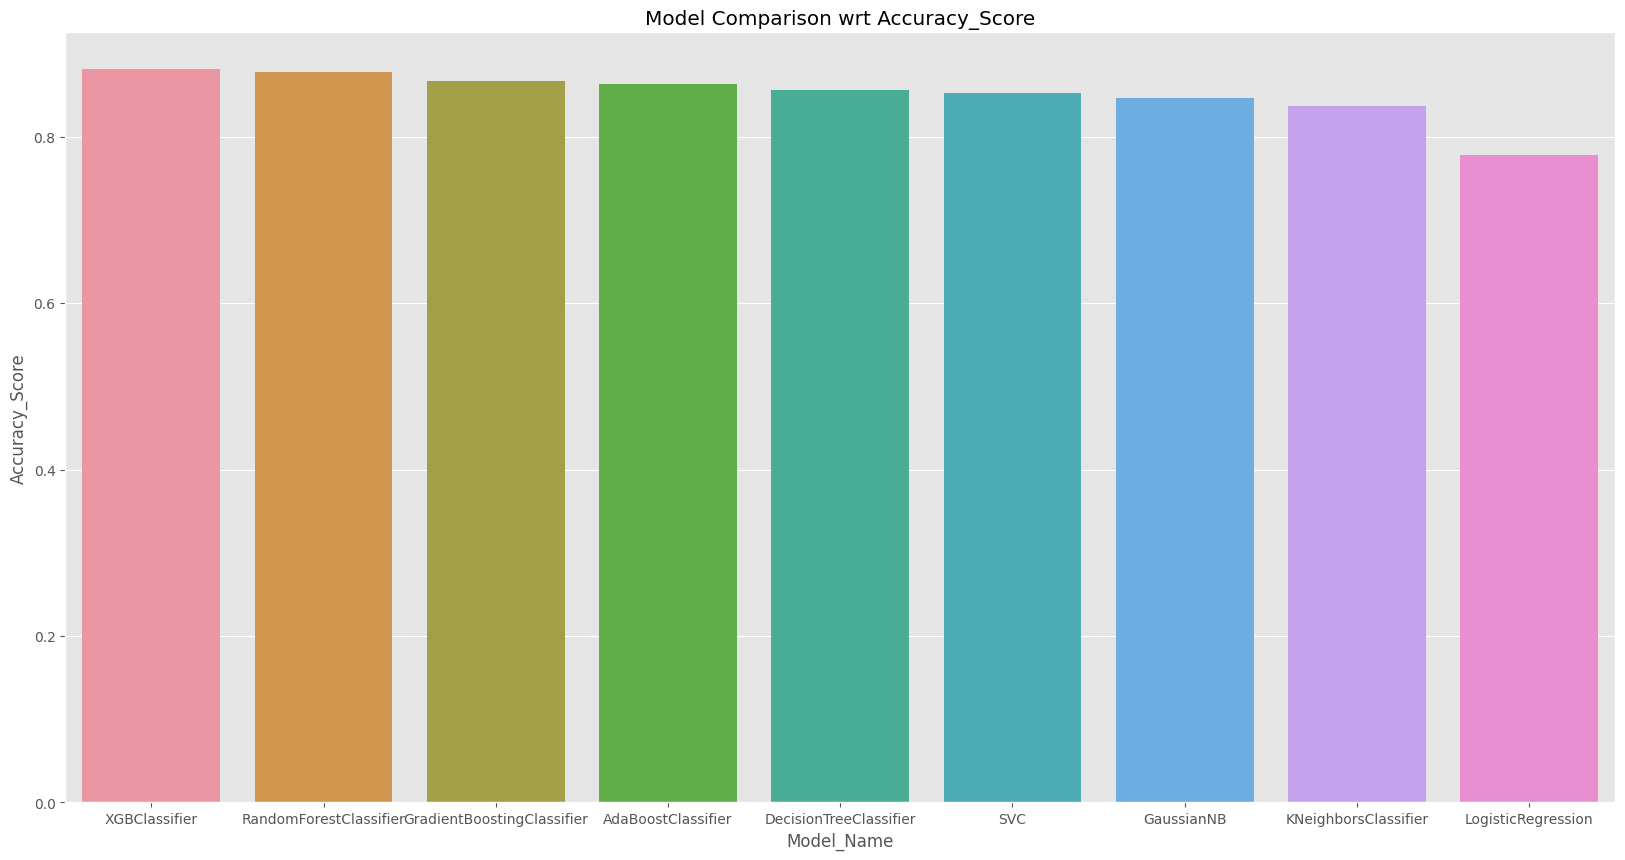

In [120]:
plt.figure(figsize=(20, 10))
order = df1.sort_values('Accuracy_Score', ascending=False)['Model_Name']
sns.barplot(x="Model_Name", y="Accuracy_Score", data=df1, order=order)
plt.title("Model Comparison wrt Accuracy_Score")
plt.show()

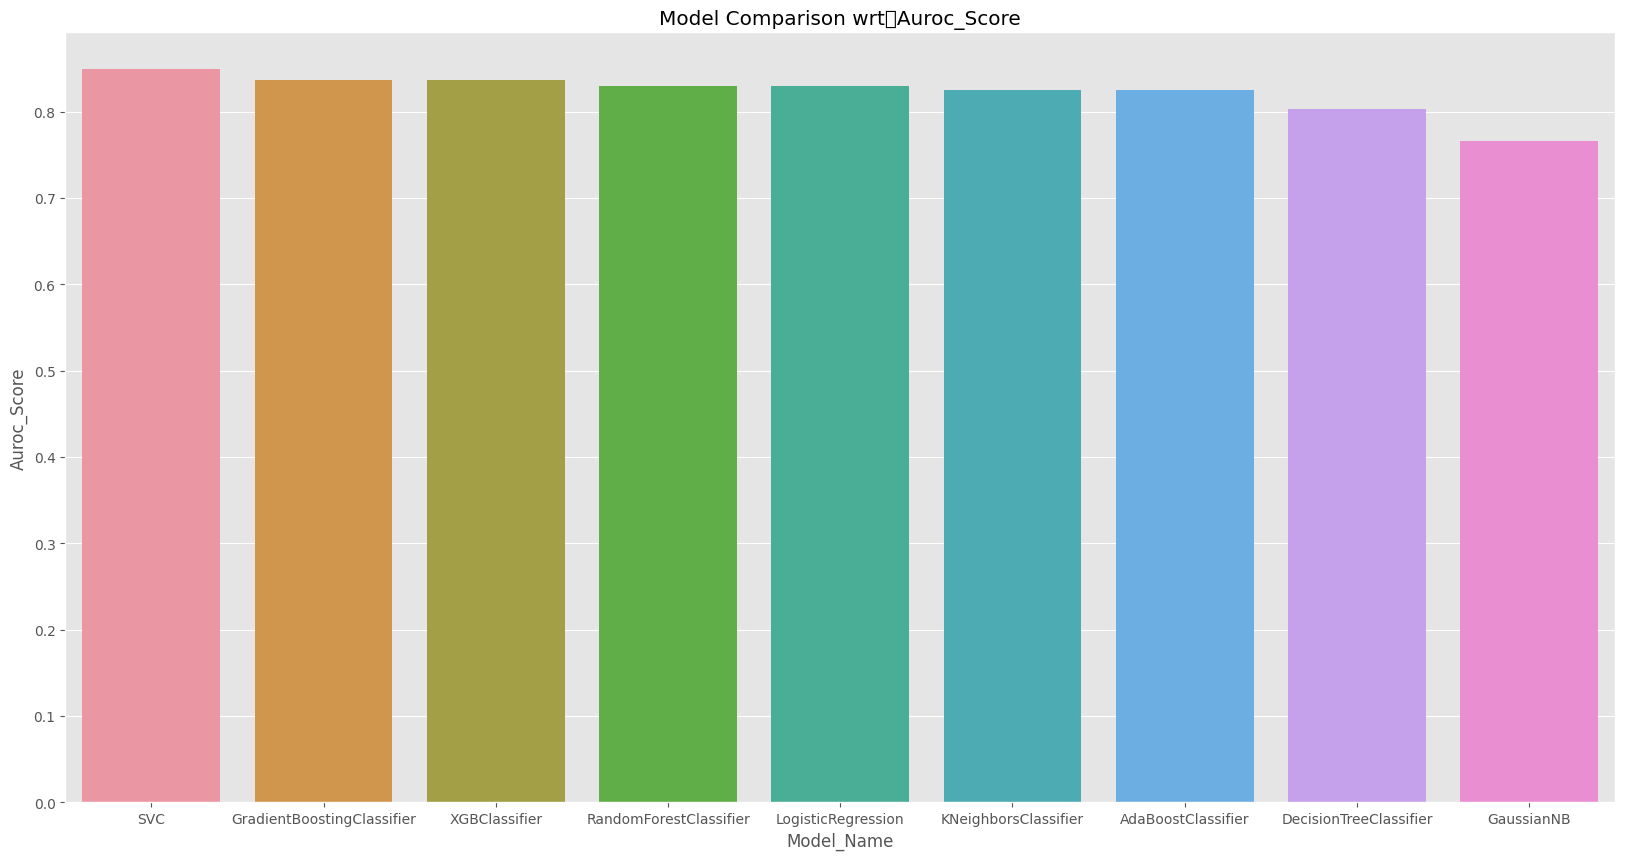

In [122]:
plt.figure(figsize=(20, 10))
order = df1.sort_values('Auroc_Score', ascending=False)['Model_Name']
sns.barplot(x="Model_Name", y="Auroc_Score", data=df1, order=order)
plt.title("Model Comparison wrt	Auroc_Score")
plt.show()

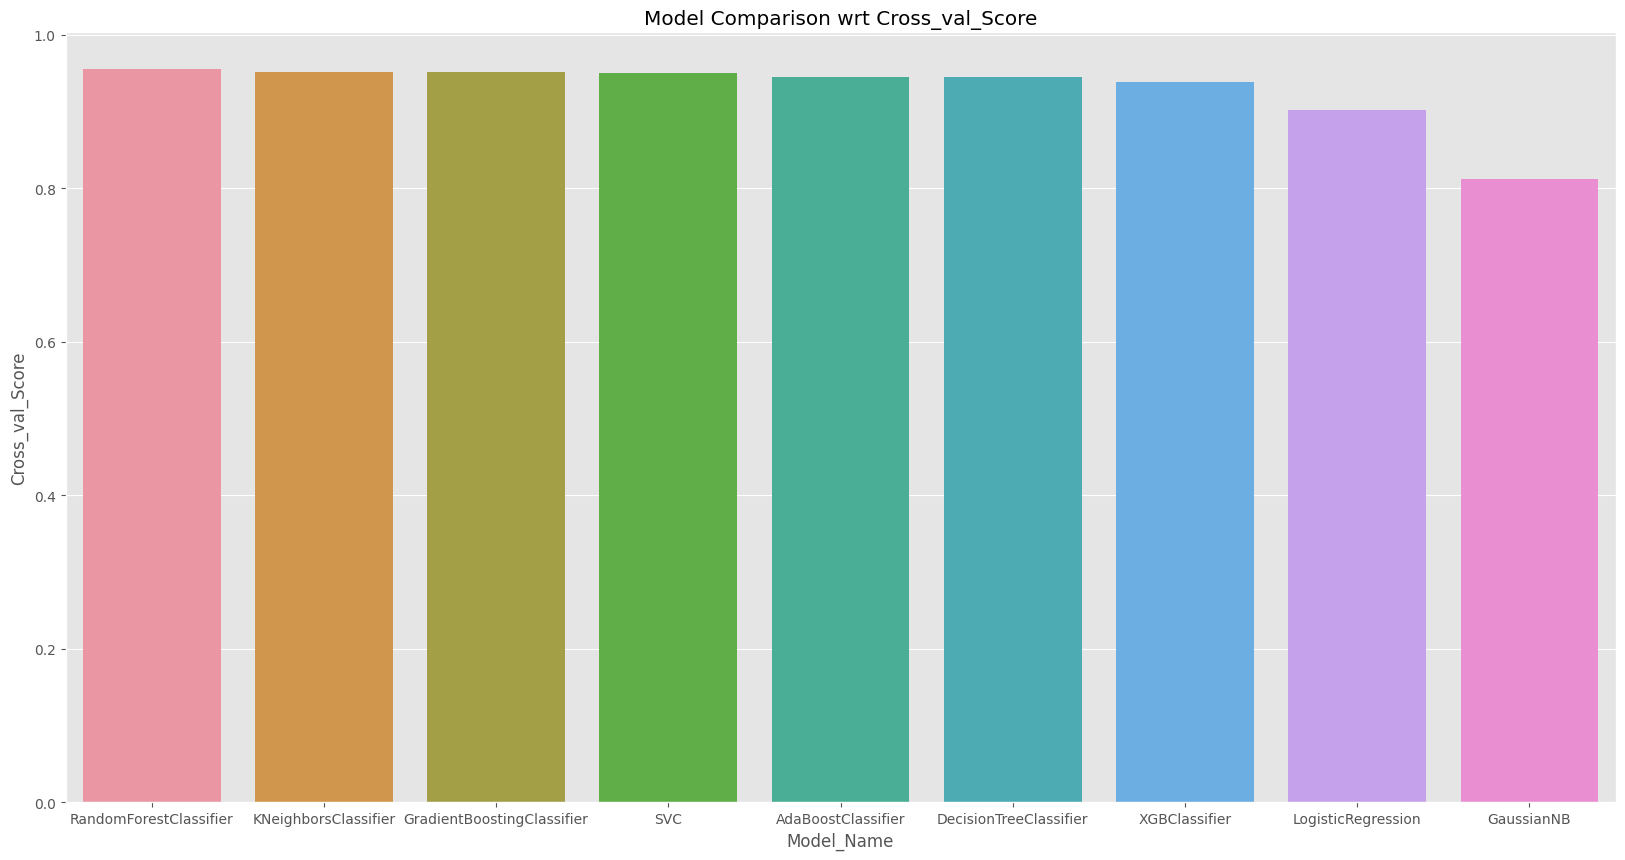

In [121]:
plt.figure(figsize=(20, 10))
order = df1.sort_values('Cross_val_Score', ascending=False)['Model_Name']
sns.barplot(x="Model_Name", y="Cross_val_Score", data=df1, order=order)
plt.title("Model Comparison wrt Cross_val_Score")
plt.show()